In [2]:
# This notebook calculates normalized cumulative distributions for various statistics of convective environment parameters both with and without condensate thresholds

# Import python libraries
import pickle
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import OrderedDict
import matplotlib.gridspec as gridspec
import copy

In [3]:
# Define colors for individual cases / simulations
scolors = OrderedDict()
scolors['ARG1.1-R_old'] = 'darkorange'
scolors['ARG1.2-R'] = 'orange'
scolors['PHI2.1-R'] = 'darkviolet'
scolors['BRA1.2-R'] = 'gold'
scolors['AUS1.1-R'] = 'mediumorchid'
scolors['PHI1.1-R'] = 'mediumpurple'
scolors['PHI1.1-RPR'] = 'mediumpurple'
scolors['USA1.1-R'] = 'lightblue'
scolors['BRA1.1-R'] = 'yellowgreen'
scolors['BRA1.1-RPR'] = 'yellowgreen'
scolors['WPO1.1-R'] = 'dodgerblue'
scolors['DRC1.1-R'] = 'green'
scolors['DRC1.1-RCR'] = 'green'
scolors['RSA1.1-R'] = 'olivedrab'

In [4]:
# Define Variable Names
var = OrderedDict()
var[0] = OrderedDict()
var[0]['titlename'] = 'ML CIN'
var[0]['units'] = 'J/kg'
var[0]['varname'] = 'mlcin'
var[0]['varins'] = 'mlcins'
var[0]['varin'] = 'mlcin'
#var[0]['bins'] = np.arange(-300,0.1,2)
var[0]['bins'] = np.arange(0,500,2)
var[0]['sbins'] = np.arange(0,1.01,0.001)

var[1] = OrderedDict()
var[1]['titlename'] = 'ML CAPE'
var[1]['units'] = 'J/kg'
var[1]['varname'] = 'MLCAPE'
var[1]['varins'] = 'mlcapes'
var[1]['varin'] = 'mlcape'
var[1]['bins'] = np.arange(0,5001,20)
var[1]['sbins'] = np.arange(0,1.01,0.001)

var[2] = OrderedDict()
var[2]['titlename'] = 'Lowlevel Wind Shear'
var[2]['units'] = 'm/s'
var[2]['varname'] = 'Shear$_{low-level}$'
var[2]['varins'] = 'shr_lls'
var[2]['varin'] = 'shr_ll'
var[2]['bins'] =  np.arange(0,60,0.2)
var[2]['sbins'] = np.arange(0,1.01,0.001)

var[3] = OrderedDict()
var[3]['titlename'] = 'Midlevel Wind Shear'
var[3]['units'] = 'm/s'
var[3]['varname'] = 'Shear$_{mid-level}$'
var[3]['varins'] = 'shr_mls'
var[3]['varin'] = 'shr_ml'
var[3]['bins'] =  np.arange(0,60,0.2)
var[3]['sbins'] = np.arange(0,1.01,0.001)

var[4] = OrderedDict()
var[4]['titlename'] = 'Midlevel Relative Humidity'
var[4]['units'] = 'unitless'
var[4]['varname'] = 'RH$_{mid-level}$'
var[4]['varins'] = 'rh_mls'
var[4]['bins'] = np.arange(0.0,1.01,0.01)
var[4]['sbins'] = np.arange(0,1.01,0.001)

var[5] = OrderedDict()
var[5]['titlename'] = 'Lowlevel Relative Humidity'
var[5]['units'] = 'unitless'
var[5]['varname'] = 'RH$_{low-level}$'
var[5]['varins'] = 'rh_lls'
var[5]['bins'] = np.arange(0.0,1.01,0.01)
var[5]['sbins'] = np.arange(0,1.01,0.001)

var[6] = OrderedDict()
var[6]['titlename'] = 'Total Column Water Vapor'
var[6]['units'] = 'kg/m^2'
var[6]['varname'] = 'tcwv'
var[6]['varins'] = 'tcwvs'
var[6]['bins'] = np.arange(0,80.1,1)
var[6]['sbins'] = np.arange(0,1.01,0.001)

var[7] = OrderedDict()
var[7]['titlename'] = 'Total Column Condensate'
var[7]['units'] = 'kg/m^2'
var[7]['varname'] = 'tcwc'
var[7]['varins'] = 'tcwcs'
var[7]['bins'] = np.arange(0,100.1,1)
var[7]['sbins'] = np.arange(0,1.01,0.001)

var[8] = OrderedDict()
var[8]['titlename'] = 'Surface RH'
var[8]['units'] = 'unitless'
var[8]['varname'] = 'RH$_{surface}$'
var[8]['varins'] = 'rh_sfcs'
var[8]['bins'] = np.arange(0.0,1.11,0.01)
var[8]['sbins'] = np.arange(0,1.01,0.001)

var[9] = OrderedDict()
var[9]['titlename'] = '850hPa RH'
var[9]['units'] = 'unitless'
var[9]['varname'] = 'RH$_{850hPa}$'
var[9]['varins'] = 'rh_850s'
var[9]['bins'] = np.arange(0.0,1.11,0.01)
var[9]['sbins'] = np.arange(0,1.01,0.001)

var[10] = OrderedDict()
var[10]['titlename'] = '500hPa RH'
var[10]['units'] = 'unitless'
var[10]['varname'] = 'RH$_{500hPa}$'
var[10]['varins'] = 'rh_500s'
var[10]['bins'] = np.arange(0.0,1.11,0.01)
var[10]['sbins'] = np.arange(0,1.01,0.001)

var[11] = OrderedDict()
var[11]['titlename'] = '250hPa RH'
var[11]['units'] = 'unitless'
var[11]['varname'] = 'RH$_{250hPa}$'
var[11]['varins'] = 'rh_250s'
var[11]['bins'] = np.arange(0.0,1.11,0.01)
var[11]['sbins'] = np.arange(0,1.01,0.001)

var[12] = OrderedDict()
var[12]['titlename'] = 'Surface Temperature'
var[12]['units'] = 'K'
var[12]['varname'] = 'TEMP$_{surface}$'
var[12]['varins'] = 't_sfcs'
var[12]['bins'] = np.arange(0,350.1,0.1)
var[12]['sbins'] = np.arange(0,1.01,0.001)

var[13] = OrderedDict()
var[13]['titlename'] = '850 Temperature'
var[13]['units'] = 'K'
var[13]['varname'] = 'TEMP$_{850hPa}$'
var[13]['varins'] = 't_850s'
var[13]['bins'] = np.arange(0,600.1,0.1)
var[13]['sbins'] = np.arange(0,1.01,0.001)

var[14] = OrderedDict()
var[14]['titlename'] = '500 Temperature'
var[14]['units'] = 'K'
var[14]['varname'] = 'TEMP$_{500hPa}$'
var[14]['varins'] = 't_500s'
var[14]['bins'] = np.arange(0,600.1,0.1)
var[14]['sbins'] = np.arange(0,1.01,0.001)

var[15] = OrderedDict()
var[15]['titlename'] = '250 Temperature'
var[15]['units'] = 'K'
var[15]['varname'] = 'TEMP$_{250hPa}$'
var[15]['varins'] = 't_250s'
var[15]['bins'] = np.arange(0,600.1,0.1)
var[15]['sbins'] = np.arange(0,1.01,0.001)

var[16] = OrderedDict()
var[16]['titlename'] = 'Surface Winds'
var[16]['units'] = 'unitless'
var[16]['varname'] = 'SPD$_{surface}$'
var[16]['varins'] = 'spd_sfcs'
var[16]['bins'] = np.arange(0.0,50.1,0.5)
var[16]['sbins'] = np.arange(0,1.01,0.001)

var[17] = OrderedDict()
var[17]['titlename'] = '850hPa Winds'
var[17]['units'] = 'unitless'
var[17]['varname'] = 'SPD$_{850hPa}$'
var[17]['varins'] = 'spd_850s'
var[17]['bins'] = np.arange(0.0,50.1,0.5)
var[17]['sbins'] = np.arange(0,1.01,0.001)

var[18] = OrderedDict()
var[18]['titlename'] = '500hPa Winds'
var[18]['units'] = 'unitless'
var[18]['varname'] = 'SPD$_{500hPa}$'
var[18]['varins'] = 'spd_500s'
var[18]['bins'] = np.arange(0.0,50.1,0.5)
var[18]['sbins'] = np.arange(0,1.01,0.001)

var[19] = OrderedDict()
var[19]['titlename'] = '250hPa Winds'
var[19]['units'] = 'unitless'
var[19]['varname'] = 'SPD$_{250hPa}$'
var[19]['varins'] = 'spd_250s'
var[19]['bins'] = np.arange(0.0,50.1,0.5)
var[19]['sbins'] = np.arange(0,1.01,0.001)

var[20] = OrderedDict()
var[20]['titlename'] = 'Surface RV'
var[20]['units'] = 'unitless'
var[20]['varname'] = 'rvsfc'
var[20]['varins'] = 'rv_sfcs'
var[20]['bins'] = np.arange(0.0,0.02,0.001)
var[20]['sbins'] = np.arange(0,1.01,0.001)

var[21] = OrderedDict()
var[21]['titlename'] = '850hPa RV'
var[21]['units'] = 'unitless'
var[21]['varname'] = 'rv850'
var[21]['varins'] = 'rv_850s'
var[21]['bins'] = np.arange(0.0,0.02,0.001)
var[21]['sbins'] = np.arange(0,1.01,0.001)

var[22] = OrderedDict()
var[22]['titlename'] = '500hPa RV'
var[22]['units'] = 'unitless'
var[22]['varname'] = 'rv500'
var[22]['varins'] = 'rv_500s'
var[22]['bins'] = np.arange(0.0,0.02,0.001)
var[22]['sbins'] = np.arange(0,1.01,0.001)

var[23] = OrderedDict()
var[23]['titlename'] = '250hPa RV'
var[23]['units'] = 'unitless'
var[23]['varname'] = 'rv250'
var[23]['varins'] = 'rv_250s'
var[23]['bins'] = np.arange(0.0,0.02,0.001)
var[23]['sbins'] = np.arange(0,1.01,0.001)

var[24] = OrderedDict()
var[24]['titlename'] = 'MidLevel Lapse Rates'
var[24]['units'] = 'K/m'
var[24]['varname'] = 't_mllr'
var[24]['varins'] = 't_mllrs'
var[24]['bins'] = np.arange(0.5,10.,0.1)/10000
var[24]['sbins'] = np.arange(0,1.01,0.001)

# Added George Bryan Cape Code with two different mixed layer depths (500m, 1km)
var[25] = OrderedDict()
var[25]['titlename'] = 'ML CAPE (GB)'
var[25]['units'] = 'J/kg'
var[25]['varname'] = 'MLCAPE (500m)'
var[25]['varins'] = 'mlcapesGB'
var[25]['varin'] = 'mlcapeGB'
var[25]['bins'] = np.arange(0,5001,20)
var[25]['sbins'] = np.arange(0,1.01,0.001)

var[26] = OrderedDict()
var[26]['titlename'] = 'ML CAPE (GB1)'
var[26]['units'] = 'J/kg'
var[26]['varname'] = 'MLCAPE (1km)'
var[26]['varins'] = 'mlcapesGB1'
var[26]['varin'] = 'mlcapeGB1'
var[26]['bins'] = np.arange(0,5001,20)
var[26]['sbins'] = np.arange(0,1.01,0.001)

var[27] = OrderedDict()
var[27]['titlename'] = 'MU CAPE (GB)'
var[27]['units'] = 'J/kg'
var[27]['varname'] = 'MUCAPE'
var[27]['varins'] = 'mucapesGB'
var[27]['varin'] = 'mucapeGB1'
var[27]['bins'] = np.arange(0,5001,20)
var[27]['sbins'] = np.arange(0,1.01,0.001)

In [5]:
#cscrs = [0.1,0.01,0.001,0.0001,9999,0.00001]


In [26]:
savepath = '/tempest/pmarin/monsoon/ENV/Plots/Summary/'
savepath = '/tempest/pmarin/monsoon/ENV/Plots/FINAL/'
plt.rcParams.update({'font.size': 13})

scr_thr = 0.25 # % of reanalysis grid that must be condensate free to include in analysis
scr_thrs= np.array([0.25,0.5,0.75,1.0]) # Thresholds to test sensitivity of variability to convection influences
scr_thrs= np.array([0.25,0.50,0.75,0.95,1.0]) # Thresholds to test sensitivity of variability to convection influences
scr_thrs= np.array([0.25,0.50,0.75,1.0]) # Thresholds to test sensitivity of variability to convection influences
savepickpath = '/tempest/pmarin/monsoon/ENV/'
cscrs = ['c0.1','c0.01','c0.001','c0.0001','c1e-05','c1e-06','c9999'] # Condonsate screening on SUBGRID
cc_now = [0,1,2,3,4,5,6]
ccs = ['-c','-b','-y','-o','-r','-m','-k']
cases4 = [['ARG1.1-R_old','ARG1.2-R','BRA1.1-R','BRA1.2-R','AUS1.1-R','DRC1.1-R','PHI1.1-R','PHI2.1-R','WPO1.1-R','USA1.1-R','RSA1.1-R'],
         ['ARG1.1-R_old','ARG1.2-R','BRA1.1-R','BRA1.2-R','DRC1.1-R','RSA1.1-R'],
         ['AUS1.1-R','PHI1.1-R','PHI2.1-R','WPO1.1-R','USA1.1-R']]

# Define analysis data savename
saveadd = '_all_100'
saveadds = ['_all_100','_all_100_120'] # Exlcuding 10km for edges, 0.25 grid spacing, two times
saveaddf = '_27KM'

#saveadds = ['_all_100_p15'] #16KM_AREA for initial time
#saveaddf = '_16KM'

gs = 4 # Sub ERA5-Grid Spacing (4 = 729 1 km sized boxes)

# Define variables
cdata_all = OrderedDict()
data_save = OrderedDict()
data_cn = OrderedDict()
bins_all = OrderedDict()
stat_var = OrderedDict()
avg_save = OrderedDict()
std_save = OrderedDict()
ran_save = OrderedDict()
ske_save = OrderedDict()
kur_save = OrderedDict()
cnt_save = OrderedDict()
min_save = OrderedDict()
p01_save = OrderedDict()
p05_save = OrderedDict()
p95_save = OrderedDict()
p99_save = OrderedDict()
max_save = OrderedDict()
q1_save = OrderedDict()
q3_save = OrderedDict()
qcd_save = OrderedDict()
cd_save = OrderedDict()
stdmm_save = OrderedDict()
stdmma_save = OrderedDict()
stdp99_save = OrderedDict()
stdp95_save = OrderedDict()
stdp90_save = OrderedDict()
stdp75_save = OrderedDict()
cdmma_save = OrderedDict() 
qcdmma_save = OrderedDict()

#Loop through cases, and load saved statistics computed by plot_env_stats
for cccc in np.arange(0,len(cases4)):
    cases2 = cases4[cccc]
    # Loop through convective environment parameters
    for v in np.arange(0,len(var)):

        if v == 7:
            continue
        #for v in np.arange(7,8):
        print(v)
        # Loop though cloud thresholds
        for cc in np.arange(0,len(cc_now)):
            ccc = cc_now[cc]
            stats = OrderedDict()
            for ss in np.arange(0,len(saveadds)):
                pickfile = '../Proc_Data/Var_Stats_'+cscrs[ccc]+saveadds[ss]+'.p'
                f = open(pickfile, 'rb')
                [avg_save[ss], std_save[ss], ran_save[ss], ske_save[ss], kur_save[ss], cnt_save[ss], min_save[ss], p01_save[ss], p05_save[ss], p95_save[ss], p99_save[ss], max_save[ss], q1_save[ss], q3_save[ss], qcd_save[ss], cd_save[ss], stdmm_save[ss], stdmma_save[ss], stdp99_save[ss], stdp95_save[ss], stdp90_save[ss], stdp75_save[ss], cdmma_save[ss], qcdmma_save[ss]] = pickle.load(f)
                f.close()    

                # XXX_save variable dimensions [casename,variable#][gs,]
                #stats = OrderedDict()
                #stats[0] = stdmma_save
                #binchange = 0
                #statnames = ['Stand. Dev. (Min-Max Scaled)']
                stlen = 11
                stats[ss,0] = stdmma_save[ss]
                binchange = 0
                statnames = ['Stand. Dev. (Min-Max Scaled)']
                stats[ss,1] = stdp99_save[ss]
                stats[ss,2] = stdp95_save[ss]
                stats[ss,3] = stdp90_save[ss]
                stats[ss,4] = stdp75_save[ss]
                stats[ss,5] = max_save[ss]
                stats[ss,6] = p99_save[ss]
                stats[ss,7] = p95_save[ss]
                stats[ss,8] = p05_save[ss]
                stats[ss,9] = p01_save[ss]
                stats[ss,10] = min_save[ss]
            
            #Loop through stats
            for st in np.arange(0,stlen):
                
                # Loop through different condensate area thresholds
                for scr_i in np.arange(1,len(scr_thrs)):
                    scr_thr_l = scr_thrs[scr_i-1]
                    scr_thr_h = scr_thrs[scr_i]
                    
                    if st >= binchange:
                        bins_now = var[v]['sbins']
                    else:
                        bins_now = var[v]['bins']
                    
                    hdata_all = np.zeros(len(bins_now))
                    data_all = []
                    cnt_all = []
                    # Loop through cases and composite results
                    for c in np.arange(0,len(cases2)):
                        cn = cases2[c]
                        datain = []; cntin = []

                        # append multiple datasets (i.e., different times)
                        for ss in np.arange(0,len(saveadds)):
                            datain = np.append(datain,stats[ss,st][cn,v][gs,:]) # data
                            cntin = np.append(cntin,cnt_save[ss][cn,v][gs,:]) # number of points that pass screening
                        datain[(cntin < scr_thr_l*729)] = np.nan # Remove reanalysis areas with XX% of area removed by condensate
                        datain[(cntin > scr_thr_h*729)] = np.nan # Remove reanalysis areas with XX% of area removed by condensate

                        # Append datasets from different case studies
                        datain2 = datain
                        data_cn[cc,v,st,cn,scr_i] = copy.deepcopy(datain2)
                        #datain2 = datain2[~np.isnan(datain2)]
                        data_all = np.append(data_all,datain2)
                        cnt_all = np.append(cnt_all,cntin)

                        # Calculate histogram for cumulative distributions
                        sampsize = len(datain2)
                        hdata,bins = np.histogram(datain2,bins=bins_now)

                        #hdata,bins = np.histogram(stats[st][cn,v][gs,:],bins=var[v]['bins'])

                        # Calculate cumulative distribution
                        hdata2 = np.insert(hdata,0,0)
                        hdata_all = hdata_all+hdata2
                        cdata = np.nancumsum(hdata2)/np.nansum(hdata2)

                    #cccc = case groupings; cc -- condensate threshold; v = variable / convective environment parameter; st = statistic
                    data_save[cccc,cc,v,st,scr_i] = copy.deepcopy(data_all) # All data
                    cdata_all[cccc,cc,v,st,scr_i] = np.nancumsum(hdata_all)/np.nansum(hdata_all) #Cumulative Distributions
                    bins_all[cccc,cc,v,st,scr_i] = bins

0


/tmp/ipykernel_3274304/4011883365.py:142: RuntimeWarning: invalid value encountered in divide
  cdata = np.nancumsum(hdata2)/np.nansum(hdata2)
/tmp/ipykernel_3274304/4011883365.py:146: RuntimeWarning: invalid value encountered in divide
  cdata_all[cccc,cc,v,st,scr_i] = np.nancumsum(hdata_all)/np.nansum(hdata_all) #Cumulative Distributions


1
2
3
4
5
6
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
0
1
2
3
4
5
6
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
0
1
2
3
4
5
6
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


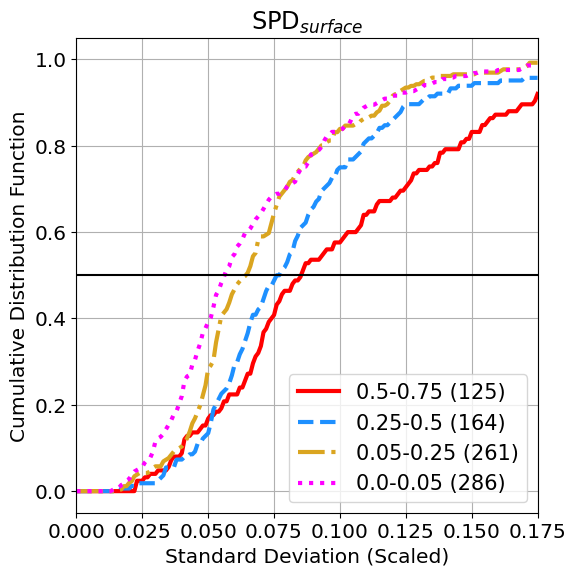

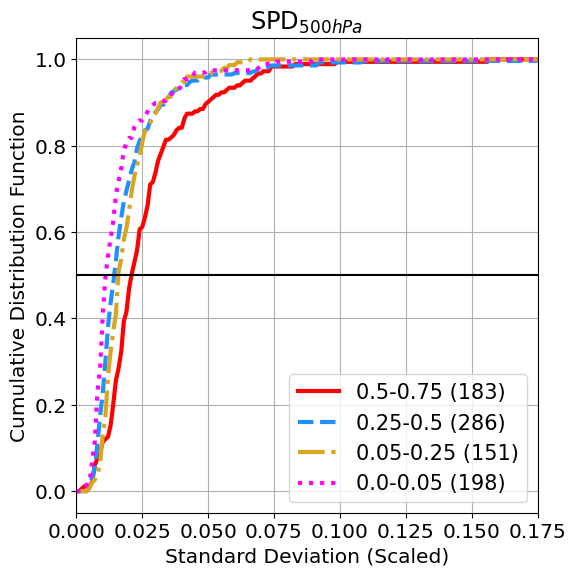

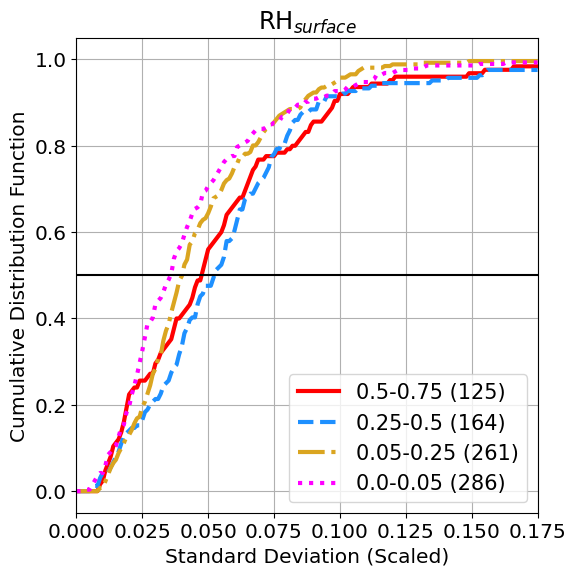

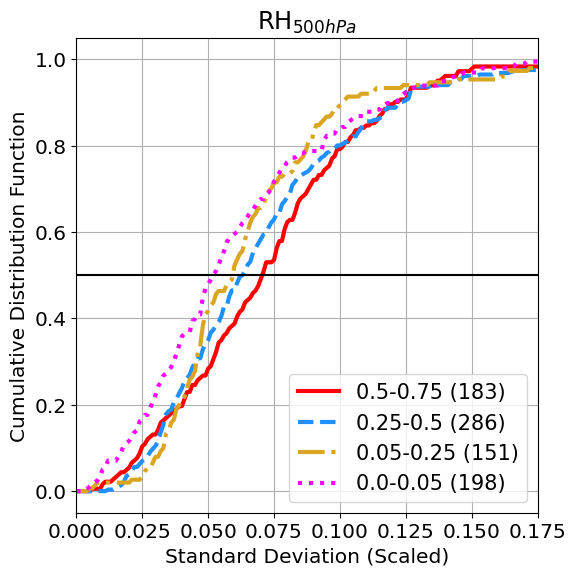

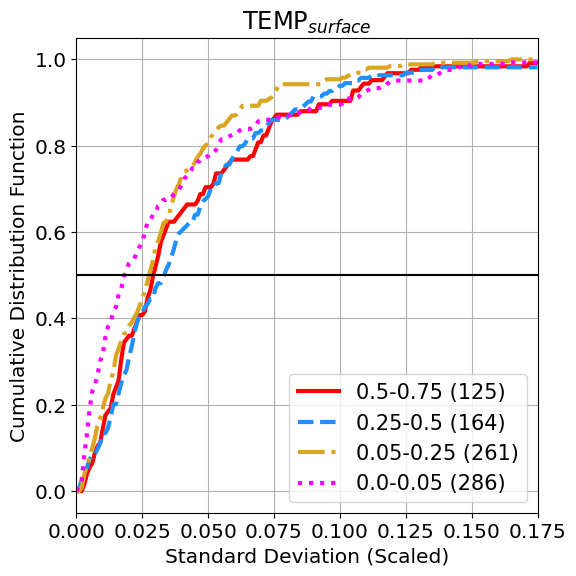

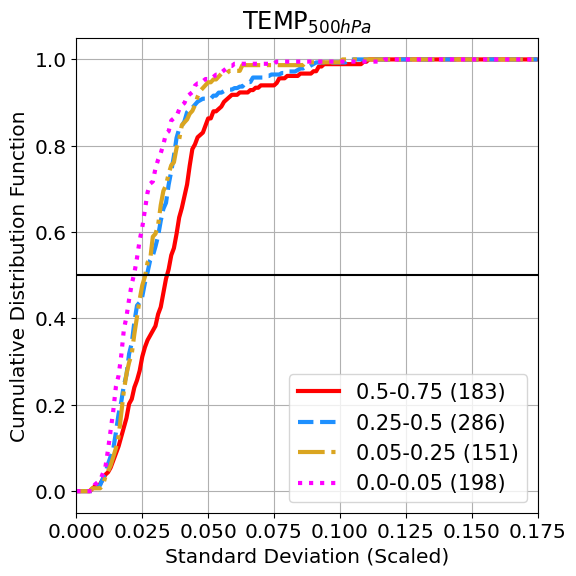

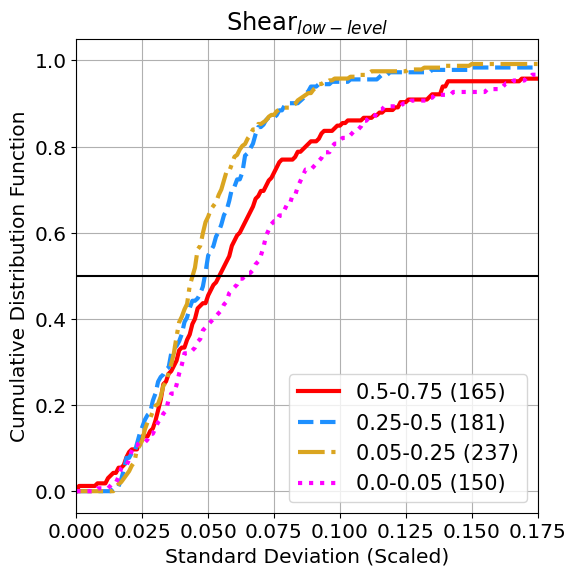

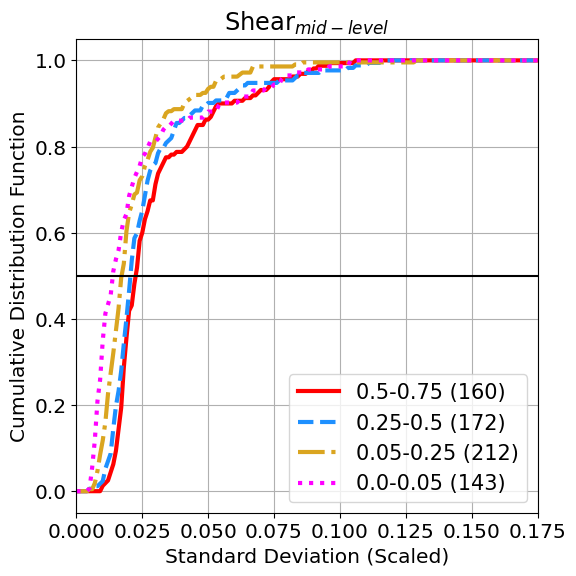

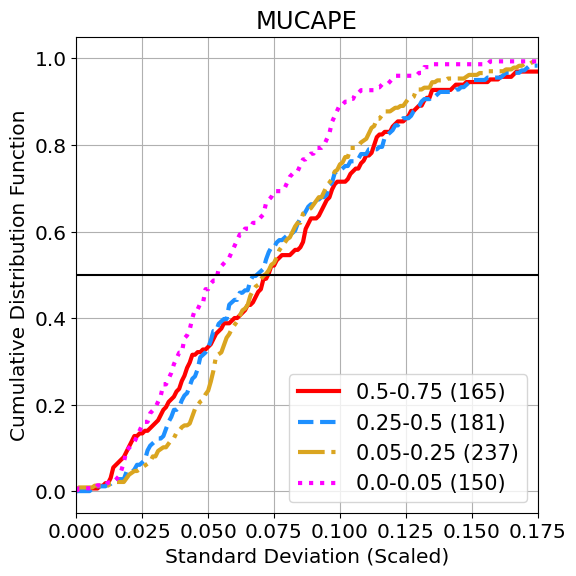

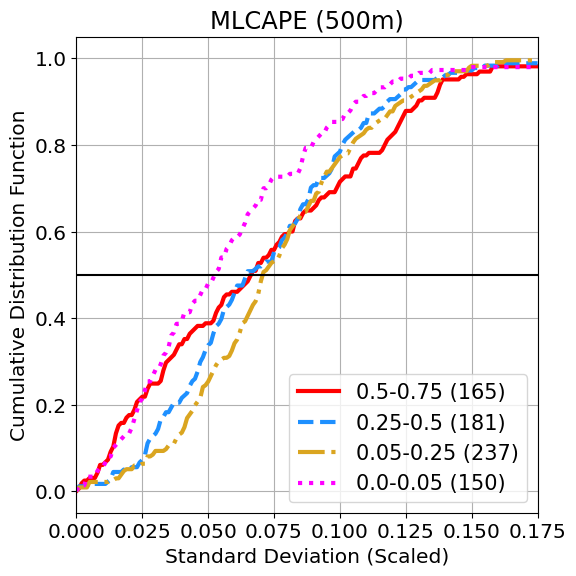

In [21]:
plt.rcParams.update({'font.size': 14.5})
cccc = 0
cc = 3 # Cloud threshold screening
st = 1 # Statistics index (1 = P99 scaling)
lfs = 15 # Legend fontsize
lw = 3
lss = ['','-','--','-.',':']
cs = ['','red','dodgerblue','goldenrod','magenta']

# Define xlims
xlims = [0,0.14]
xlims = [0,0.175]

# Variable array (indicies)
var_arr = np.array([16,18,8,10,12,14,2,3,27,25])

# Loop through variables
cntv = 0
for v in var_arr:
    fig,ax = plt.subplots(1,1,figsize=[6,6])
    for scr_i in np.arange(1,len(scr_thrs)):
        scr_thr_l = scr_thrs[scr_i-1] # Current Screen Amount (lower bound)
        scr_thr_h = scr_thrs[scr_i] # Current Screen Amount (upper bound)
        pcnt = np.count_nonzero(~np.isnan(data_save[cccc,cc,v,st,scr_i]))
        ax.plot(bins_all[cccc,cc,v,st,scr_i],cdata_all[cccc,cc,v,st,scr_i],c=cs[scr_i],ls=lss[scr_i],lw=lw,label=str(np.round(1-scr_thr_h,2))+'-'+str(np.round(1-scr_thr_l,2))+' ('+str(int(pcnt))+')')
        #print(np.count_nonzero(~np.isnan(data_save[cccc,cc,v,st])))
        cntv = cntv + 1  

    ax.plot([xlims[0],xlims[1]],[0.5, 0.5],'-k',label='_nolegend_')
    ax.set_xlim(xlims)
    ax.set_title(var[v]['varname'])
    ax.set_ylabel('Cumulative Distribution Function')
    ax.set_xlabel('Standard Deviation (Scaled)')
    ax.grid()
    #ax.legend(fontsize=lfs)
    #plt.tight_layout()
    #plt.savefig(savepath+'REV_CC_'+var[v]['varins']+'.pdf')



0 3 27 1
[0.         0.00775194 0.00775194 ... 1.         1.         1.        ]
0 3 25 1
[0.         0.01033592 0.01033592 ... 1.         1.         1.        ]
1 3 27 1
[0.         0.01239669 0.01239669 ... 1.         1.         1.        ]
1 3 25 1
[0.         0.01652893 0.01652893 ... 1.         1.         1.        ]
2 3 27 1
[0. 0. 0. ... 1. 1. 1.]
2 3 25 1
[0. 0. 0. ... 1. 1. 1.]


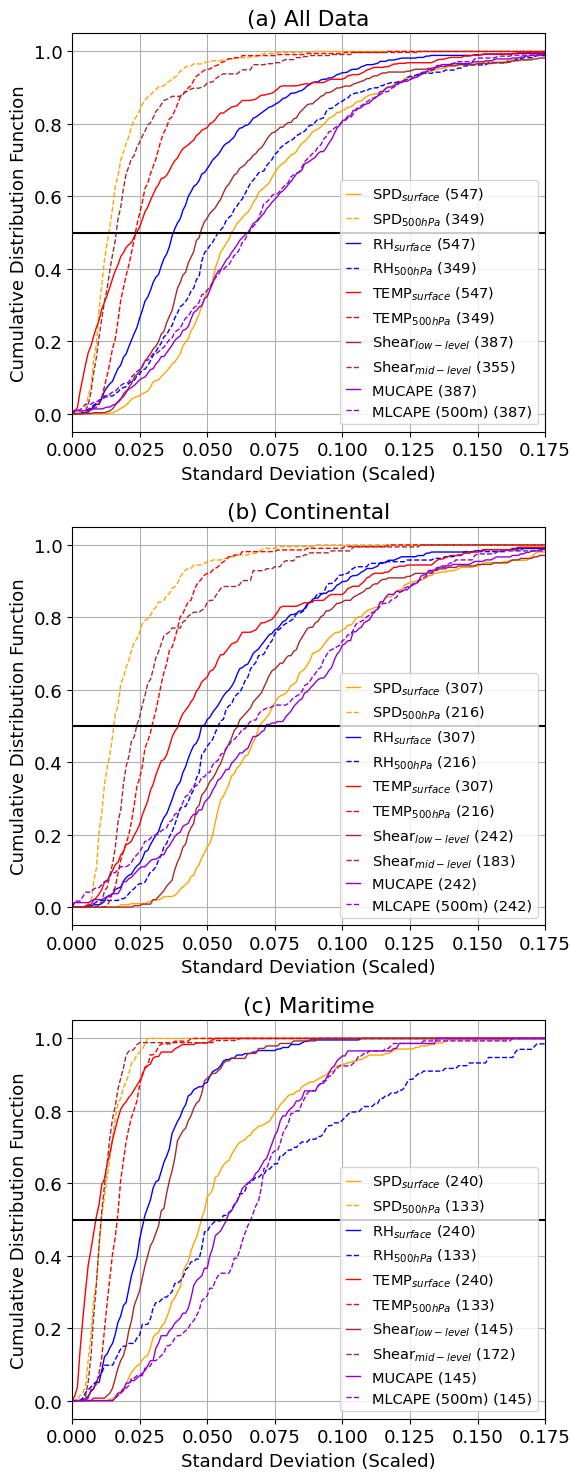

In [27]:
# Plot cumulative distribution functions for different groupings of cases/simulations

cc = 3 # Cloud threshold screening
st = 1 # Statistics index (1 = P99 scaling)
lfs = 10.5 # Legend fontsize
hl = 1 # Handle length
scr_i = 3
fig,ax = plt.subplots(3,1,figsize=[6,15])
atitles = ['(a) All Data','(b) Continental','(c) Maritime']

# Define xlims
xlims = [0,0.14]
xlims = [0,0.175]
#xlims = [0,0.20]
#xlims = [0,0.25]
#xlims = [0,0.40]

#blw = [9,10,25,26,16]
blw = []
for cccc in np.arange(0,3): 
    #print(cccc)
    lss = ['-','--',':']
    lc = 'orange'
    vararr = [16,17,18]
    vararr = [16,18]
    cntv = 0
    for v in vararr:
        lw = 1
        if v == 7:
            continue
        if v in blw:
            lw = 3
        pcnt = np.count_nonzero(~np.isnan(data_save[cccc,cc,v,st,scr_i]))        
        ax[cccc].plot(bins_all[cccc,cc,v,st,scr_i],cdata_all[cccc,cc,v,st,scr_i],c = lc,ls=lss[cntv],lw=lw,label=var[v]['varname']+' ('+str(int(pcnt))+')')
        #print(np.count_nonzero(~np.isnan(data_save[cccc,cc,v,st])))
        cntv = cntv + 1

    lc = 'blue'
    vararr = [8,9,10]
    vararr = [8,10]
    cntv = 0
    for v in vararr:
        lw = 1
        if v == 7:
            continue
        if v in blw:
            lw = 3
        pcnt = np.count_nonzero(~np.isnan(data_save[cccc,cc,v,st,scr_i]))
        ax[cccc].plot(bins_all[cccc,cc,v,st,scr_i],cdata_all[cccc,cc,v,st,scr_i],c = lc,ls=lss[cntv],lw=lw,label=var[v]['varname']+' ('+str(int(pcnt))+')')
        #print(np.count_nonzero(~np.isnan(data_save[cccc,cc,v,st])))
        cntv = cntv + 1

    lc = 'red'
    vararr = [12,13,14]
    vararr = [12,14]
    cntv = 0
    for v in vararr:
        lw = 1
        if v == 7:
            continue
        if v in blw:
            lw = 3
        pcnt = np.count_nonzero(~np.isnan(data_save[cccc,cc,v,st,scr_i]))
        ax[cccc].plot(bins_all[cccc,cc,v,st,scr_i],cdata_all[cccc,cc,v,st,scr_i],c = lc,ls=lss[cntv],lw=lw,label=var[v]['varname']+' ('+str(int(pcnt))+')')
       # print(np.count_nonzero(~np.isnan(data_save[cccc,cc,v,st])))
       # print(len(data_save[cccc,cc,v,st]))
        cntv = cntv + 1

    lc = 'brown'
    vararr = [2,3]
    cntv = 0
    for v in vararr:
        lw = 1
        if v == 7:
            continue
        if v in blw:
            lw = 3
        pcnt = np.count_nonzero(~np.isnan(data_save[cccc,cc,v,st,scr_i]))
        ax[cccc].plot(bins_all[cccc,cc,v,st,scr_i],cdata_all[cccc,cc,v,st,scr_i],c = lc,ls=lss[cntv],lw=lw,label=var[v]['varname']+' ('+str(int(pcnt))+')')
       # print(np.count_nonzero(~np.isnan(data_save[cccc,cc,v,st])))
        cntv = cntv + 1

    lc = 'darkviolet'
    vararr = [1] #METPY CAPE WITH 100 HPA ML DEPTH (~1KM)
#    vararr = [25] GB CAPE WITH 500M ML DEPTH
#    vararr = [26] GB CAPE WITH 1000M ML DEPTH
    vararr = [27,25,26] #METPY CAPE WITH 100 HPA ML DEPTH (~1KM)
    vararr = [27,25] #METPY CAPE WITH 100 HPA ML DEPTH (~1KM)
    cntv = 0
    for v in vararr:
        lw = 1
        if v == 7:
            continue
        if v in blw:
            lw = 3
        pcnt = np.count_nonzero(~np.isnan(data_save[cccc,cc,v,st,scr_i]))
        ax[cccc].plot(bins_all[cccc,cc,v,st,scr_i],cdata_all[cccc,cc,v,st,scr_i],c = lc,ls=lss[cntv],lw=lw,label=var[v]['varname']+' ('+str(int(pcnt))+')')
        #print(np.count_nonzero(~np.isnan(data_save[cccc,cc,v,st])))
        print(cccc,cc,v,st)
        print(cdata_all[cccc,cc,v,st,scr_i])
        cntv = cntv + 1  

    ax[cccc].plot([xlims[0],xlims[1]],[0.5, 0.5],'-k',label='_nolegend_')
    ax[cccc].set_xlim(xlims)
    ax[cccc].set_title(atitles[cccc])
    ax[cccc].set_ylabel('Cumulative Distribution Function')
    ax[cccc].set_xlabel('Standard Deviation (Scaled)')
    ax[cccc].grid()
    ax[cccc].legend(fontsize=lfs,handlelength=hl)
plt.tight_layout()
plt.savefig(savepath+'Figure04'+saveaddf+'_Rev_CC0-25.pdf')
plt.savefig(savepath+'Figure04'+saveaddf+'_Rev_CC0-25.png')